In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_json("exps.jsonl", lines=True)
print(len(df))
df.head()

283


,id,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,89ceb09a69f6dd22d587ad0e1d1161a7f31b166d,coxal-eyas,bdsaglam/musique,answerable,validation,llama-3.3-70b-tgi,1.0,cok/adapted.txt,cq.txt,manual/cok.json,...,283,673,102.307578,30.530511,45,83.0,94.0,114.00,239,COK
1,569fe899f90c8bdaf47866bbb36fc24c88f4925c,sulfa-lame,bdsaglam/musique,answerable,validation,llama-3.3-70b-tgi,0.5,cot/format-thought.txt,cq.txt,manual/cot.json,...,919,716,94.681564,60.827044,29,59.0,80.0,112.25,873,COT
2,98498237a46b9b473706d7f773a27e67e30523d9,wacky-ciao,bdsaglam/musique,answerable,validation,llama-3.3-70b-tgi,0.5,cte/format-triples-ere-few.txt,cq.txt,manual/cte-triples.json,...,347,686,52.836735,21.162000,18,39.0,48.0,61.00,177,CTE
3,288b4a6bb49a305006dc7f891cc0c52cc0b77d0b,tarry-bani,bdsaglam/musique,answerable,validation,llama-3.3-70b-tgi,0.5,cte/format-triples-few.txt,cq.txt,manual/cte-triples.json,...,141,643,52.905132,26.209948,16,36.0,46.0,61.50,228,CTE
4,e3ed6981ac0d21340a3b5eca1e92696a1e7fdd0a,keyed-brig,bdsaglam/musique,answerable,validation,llama-3.3-70b-tgi,0.0,cot/format-thought.txt,cq.txt,manual/cot.json,...,375,709,92.279267,70.008643,23,52.0,75.0,104.00,839,COT


In [3]:
param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = [col for col in df.columns if col.startswith("metrics.")]
df.drop(
    columns=[
        "id",
        "params.dataset.path",
        "params.dataset.name",
        "params.dataset.split",
    ],
    inplace=True,
)

In [4]:
target_param_cols = [
    "params.qa.model",
    "params.qa.temperature",
    "params.qa.technique",
    "params.qa.system_prompt",
    "params.qa.few_shot_examples",
    "params.qa.n_shot",
    "params.qa.n_sc",
]
df = df.sort_values(target_param_cols + ["params.run"])
df.reset_index(drop=True, inplace=True)
df.head()

,name,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.run,metrics.exact_match,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,weepy-nave,llama-3-70b-tgi,0.0,ccot/format-thought.txt,cq.txt,manual/ccot.json,0,1,1,0.592470,...,140,696,49.435345,16.512611,19,38.0,47.0,58.0,139,CCOT
1,heigh-scup,llama-3-70b-tgi,0.0,ccot/format-thought.txt,cq.txt,manual/ccot.json,0,1,2,0.595780,...,121,693,49.655123,17.063828,19,38.0,47.0,58.0,165,CCOT
2,mirky-rede,llama-3-70b-tgi,0.0,ccot/format-thought.txt,cq.txt,manual/ccot.json,0,1,3,0.594952,...,182,701,49.375178,16.364698,18,38.0,47.0,59.0,131,CCOT
3,yolky-clay,llama-3-70b-tgi,0.0,ccot/format-thought.txt,cq.txt,manual/ccot.json,1,1,1,0.606123,...,107,681,48.685756,16.810306,16,37.0,46.0,57.0,137,CCOT
4,privy-impi,llama-3-70b-tgi,0.0,ccot/format-thought.txt,cq.txt,manual/ccot.json,1,1,2,0.604468,...,107,685,48.566423,16.461288,16,37.0,46.0,57.0,128,CCOT


In [5]:
def remove_ext(filename):
    return filename.split(".", 1)[0]

df["params.qa.system_prompt"] = df["params.qa.system_prompt"].map(remove_ext)
df["params.qa.user_prompt_template"] = df["params.qa.user_prompt_template"].map(remove_ext)
df["params.qa.few_shot_examples"] = df["params.qa.few_shot_examples"].map(remove_ext)

In [6]:
# make temperature 1 decimal
df["params.qa.temperature"] = df["params.qa.temperature"].round(1)

In [7]:
def parse_instruction(row):
    technique = row["params.qa.technique"].lower()
    sp = row["params.qa.system_prompt"].lower().replace(technique + "/", "")
    fs = row["params.qa.few_shot_examples"].lower().replace("/" + technique, "")
    return f"{technique}/{sp}/{fs}"

df["instruction"] = df.apply(parse_instruction, axis=1)

In [8]:
df["instruction"].unique()

array(['ccot/format-thought/manual', 'cok/adapted/manual',
       'cot/format-thought/manual',
       'cte/format-sro-triples-few/manual-triples',
       'cte/format-triples-ere-few/manual-triples',
       'cte/format-triples-few/manual-triples',
       'direct/format-few/manual'], dtype=object)

In [9]:
avg_df = df.groupby(target_param_cols)[metric_cols].max().reset_index()
# find the rows with max f1 score for each technique group
max_f1_rows = avg_df.groupby('params.qa.technique')["metrics.f1"].idxmax()
best_df = avg_df.loc[max_f1_rows, target_param_cols + metric_cols].sort_values('metrics.f1', ascending=False)
best_df

,params.qa.model,params.qa.temperature,params.qa.technique,params.qa.system_prompt,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,...,metrics.gen_token_count.success.75%,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max
75,llama-3.3-70b-tgi,0.5,COK,cok/adapted,manual/cok,1,1,0.620604,0.748467,0.658147,...,108.0,344,616,108.018033,39.907092,47,82.0,100.0,124.00,466
23,llama-3-70b-tgi,0.5,CTE,cte/format-triples-ere-few,manual/cte-triples,1,1,0.626396,0.741961,0.654952,...,49.0,116,642,46.380062,18.668939,14,34.0,43.0,54.75,139
19,llama-3-70b-tgi,0.5,COT,cot/format-thought,manual/cot,1,1,0.608192,0.721669,0.637380,...,72.0,243,694,72.091043,28.554543,18,53.0,68.0,86.75,227
15,llama-3-70b-tgi,0.5,CCOT,ccot/format-thought,manual/ccot,1,1,0.604882,0.720616,0.634185,...,51.0,133,704,48.698413,16.852506,16,38.0,46.0,58.00,147
27,llama-3-70b-tgi,0.5,DIRECT,direct/format-few,manual/direct,1,1,0.587919,0.704551,0.625399,...,7.0,22,726,6.120448,4.707984,3,4.0,5.0,6.00,60


In [10]:
def plot_heatmap(df, metric_col):
    instructions = df["instruction"].unique()
    n = len(instructions)
    n_cols = 2
    n_rows = (n + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 6))

    vmin = df[metric_col].min()
    vmax = df[metric_col].max()

    for ax, instruction in zip(axes.flatten(), instructions):
        subset_df = df[df["instruction"] == instruction]
        pivot_table = subset_df.pivot_table(
            values=metric_col,
            index="params.qa.temperature",
            columns="params.qa.n_shot",
            aggfunc="mean",
        )
        sns.heatmap(
            pivot_table,
            annot=True,
            fmt=".3f",
            cmap="YlGnBu",
            ax=ax,
            yticklabels=True,
            vmin=vmin,
            vmax=vmax
        )
        ax.set_title(instruction)
        ax.set_xlabel("Number of Few-Shot Examples")
        ax.set_ylabel("Temperature")
        ax.invert_yaxis()

    # Remove any empty subplots
    for ax in axes.flatten()[n:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.2)  # Add padding between plots

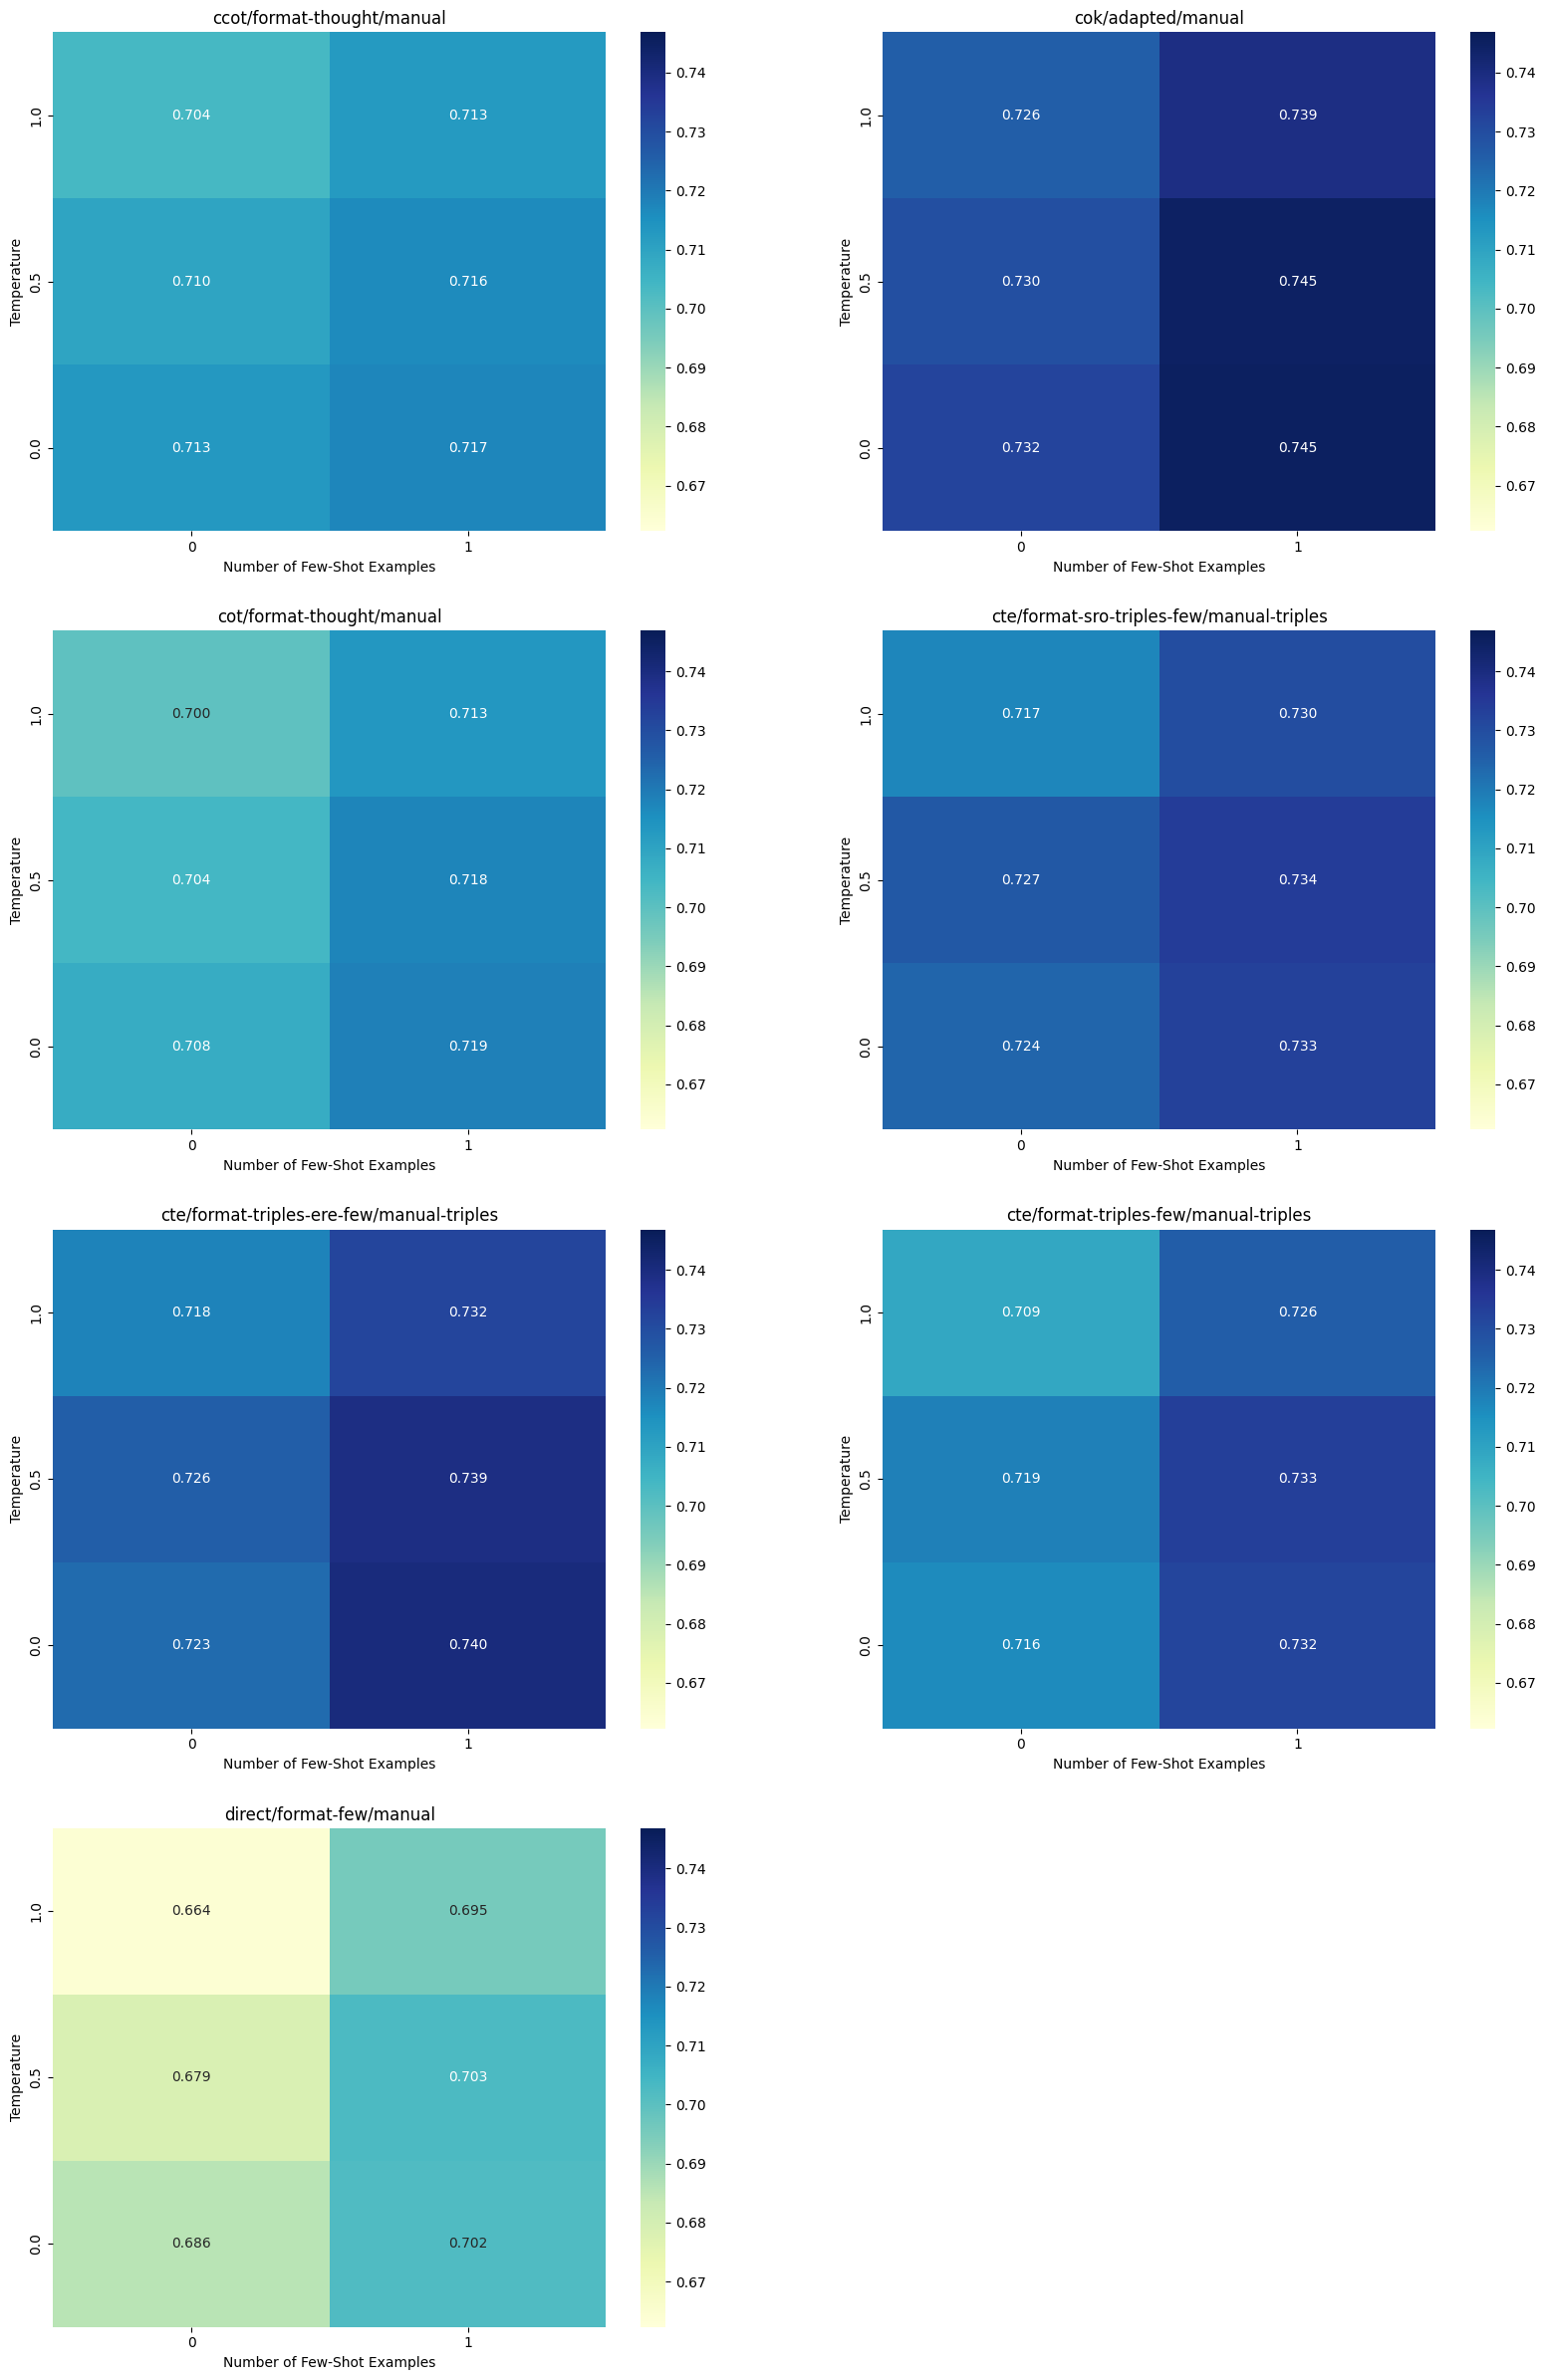

In [11]:
model = 'llama-3-70b-tgi'
plot_heatmap(df[df["params.qa.model"] == model], "metrics.f1")

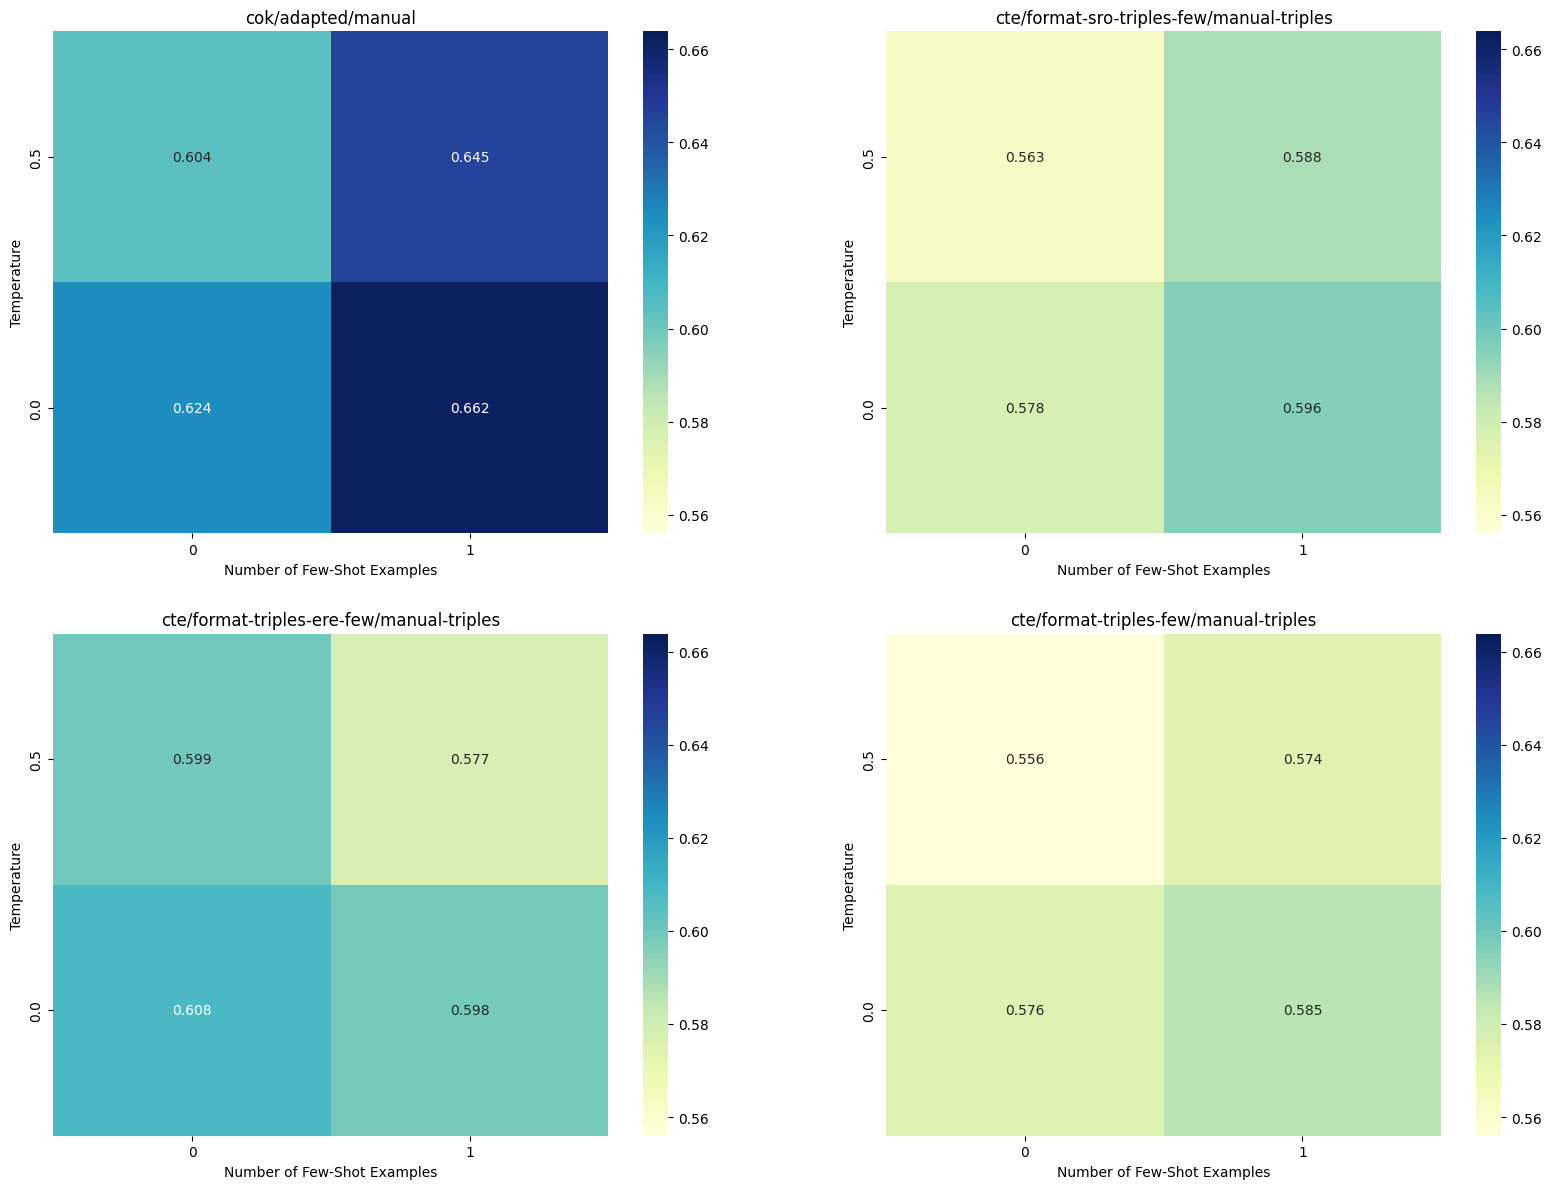

In [12]:
model = 'llama-3-8b-tgi'
plot_heatmap(df[df["params.qa.model"] == model], "metrics.f1")

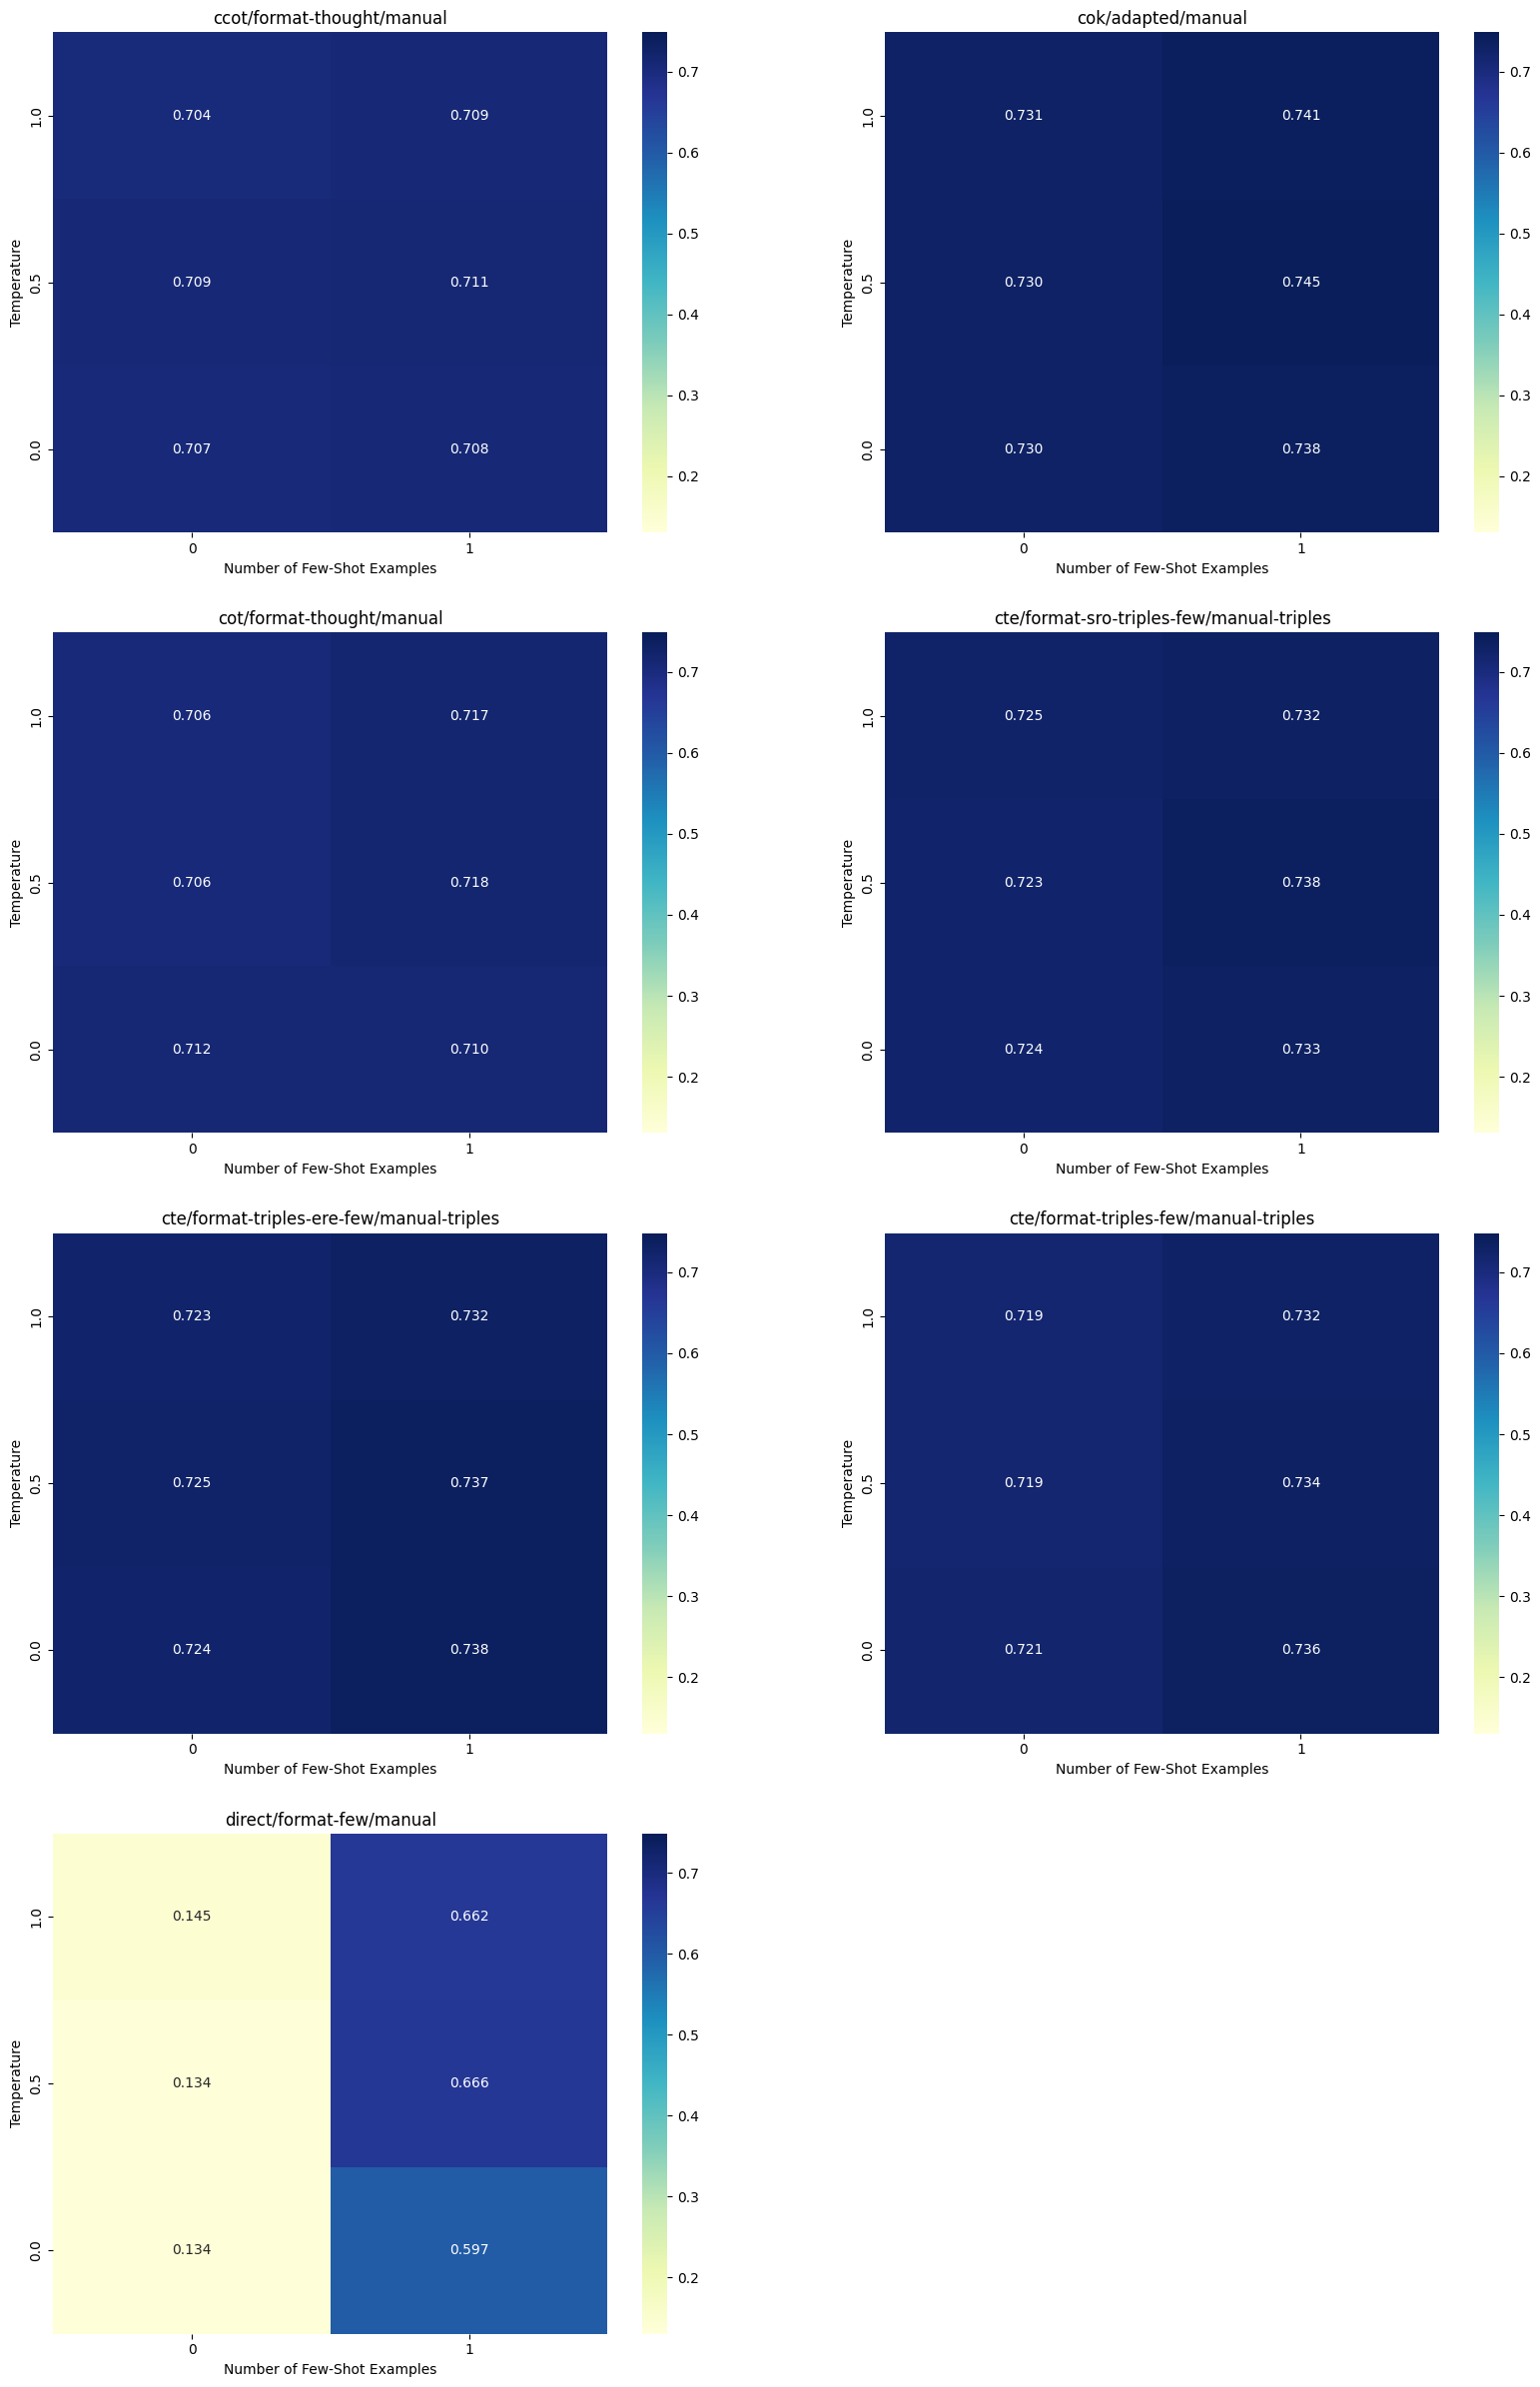

In [13]:
model = 'llama-3.3-70b-tgi'
plot_heatmap(df[df["params.qa.model"] == model], "metrics.f1")